# 📓 Άσκηση 8 - Ανάλυση και επεξεργασία εικόνων DICOM με τη χρήση python



### 1. Άνοιγμα και επεξεργασία αρχείου DICOM


Αρχικά, πρέπει να ανεβάσετε το υλικό που παρέχεται μαζί με την άσκηση στο Google Colab. Πιο συγκεκριμένα, είναι απαραίτητα τα αρχεία:

*   ctdicom.dcm
*   cytimage.jpg
*   groups_train.mat

Εάν χρησιμοποιείτε Jupyter Notebook τοπικά στον υπολογιστή σας, θα πρέπει να τοποθετήσετε τα αρχεία αυτά στον ίδιο φάκελο που περιέχει το jupyter notebook σας (αρχείο .ipynb), ώστε να μπορείτε να τα χρησιμοποιήσετε.

Εάν χρησιμοποιείτε Google Colab, είναι απαραίτητο να εγκαταστήσετε το module pydicom με την παρακάτω εντολή.

Εάν χρησιμοποιείτε jupyter notebook, τότε εφόσον έχετε εγκαταστήσει σωστά όλα τα dependencies, μπορείτε να τη σβήσετε ώστε να μην την τρέξετε.



In [ ]:
!pip install pydicom

     |████████████████████████████████| 2.0 MB 9.7 MB/s 


Ας κάνουμε import το pydicom και ας διαβάσουμε το αρχείο ctdicom.dcm.

In [ ]:
import pydicom

ds = pydicom.dcmread('ctdicom.dcm')
print(ds)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 144
(0002, 0001) File Meta Information Version       OB: b'\x01\x00'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 64.572.218.916.2
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.756.777.001
(0002, 0016) Source Application Entity Title     AE: 'PAPYRUS 3.0'
-------------------------------------------------
(0008, 0000) Group Length                        UL: 688
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL', 'CT_SOM5 SEQ']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.12.2.1107.5.1.4.24612.4.0.2620333929291460
(0008, 0020) S

/usr/local/lib/python3.7/dist-packages/pydicom/valuerep.py:290: UserWarning: Invalid value for VR UI: '1.2.756.777.001'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


Βλέπουμε, λοιπόν, πως το αρχείο αυτό περιέχει διάφορες πληροφορίες όπως το όνομα του ασθενή, το φύλο, την ηλικία, το όνομα του νοσοκομείου, κ.ά.

Μπορούμε να χρησιμοποιήσουμε αυτές τις πληροφορίες, χρησιμοποιώντας την αντίστοιχη λέξη κλειδί. Για παράδειγμα, εάν θέλουμε να τυπώσουμε την ηλικία του ασθενή:

In [ ]:
print(ds.PatientAge)

073Y


Παρατηρούμε πως το αρχείο dicom που τυπώσαμε προηγουμένως, περιέχει την εξής πληροφορία:

```
(7fe0, 0010) Pixel Data           OW: Array of 262144 elements
```

Αυτό είναι το πεδίο το οποίο περιέχει την εικόνα μας. Ωστόσο, εάν προσπαθήσουμε να φορτώσουμε την εικόνα από εκεί, θα παρατηρήσουμε ότι μας επιστρέφει πληροφορία τύπου "Bytes", δηλαδή σε δυαδική μορφή.

In [ ]:
img = ds.PixelData
print(type(img))

<class 'bytes'>


Ευτυχώς, η pydicom μας προσφέρει έναν έτοιμο τρόπο για τη φόρτωση της εικόνας σε μορφή που να μπορούμε να επεξεργαστούμε.

In [ ]:
img = ds.pixel_array
print(type(img))

<class 'numpy.ndarray'>


Ας εμφανίσουμε την εικόνα που φορτώσαμε, για να δούμε τί περιέχει.

Image dimensions: (512, 512)
Image type: uint8


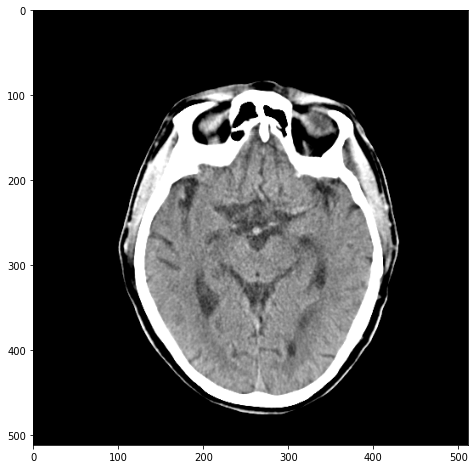

In [ ]:
print("Image dimensions: {}\nImage type: {}".format(img.shape, img.dtype))

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.imshow(img, cmap='gray')
plt.show()

Βλέπουμε πως πρόκειται για μια εικόνα μεγέθους 512x512, τύπου uint8. Αυτό σημαίνει πως κάθε pixel αποτελείται από έναν unsigned integer (δηλαδή έναν ακέραιο χωρίς πρόσημο), μεγέθους 8 bit. $2^8 = 256$, άρα περιμένουμε πως κάθε pixel θα κυμαίνεται μεταξύ των τιμών $[0, 255]$.

Στη συνέχεια, θα πραγματοποιήσουμε κατωφλίωση της εικόνας. Αυτό μπορεί να είναι επιθυμητό εάν θέλουμε, για παράδειγμα, να απομονώσουμε τη δομή των οστών.

Το μόνο που έχουμε να κάνουμε είναι να θέσουμε ίσα με το 0, όλα τα pixels τα οποία δεν ανήκουν μεταξύ δύο ακραίων τιμών. Σε αυτή την περίπτωση, ως ακραίες τιμές επιλέγουμε το 250 και το 255.

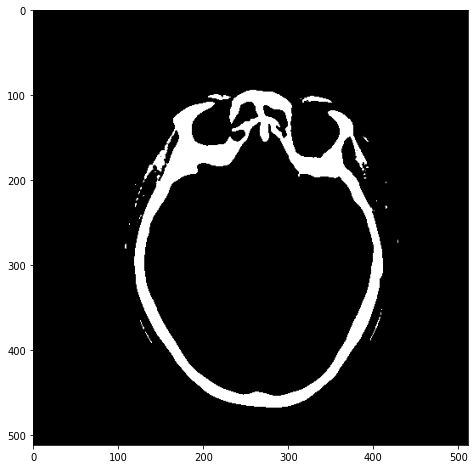

In [ ]:
import numpy as np

new_img = np.clip(img, 250, 255)

plt.figure(figsize=(8, 8))
plt.imshow(new_img, cmap='gray')
plt.show()

## 2. Ανάλυση και επεξεργασία κυτταρολογικών εικόνων για τον αυτόματο εντοπισμό καρκινικών κυττάρων

Στην εφαρμογή αυτή παρουσιάζεται ένα αλγόριθμος για τον εντοπισμό καρκινικών κυττάρων σε μια κυτταρολογική εικόνα μικροσκοπίου.

Για την ακριβή διάγνωση οποιουδήποτε καρκίνου απαιτείται κυτταρολογική ή ιστολογική επιβεβαίωση με λήψη δείγματος (π.χ. βιοψία) από την ύποπτη περιοχή. Ένα  από τα αντικείμενα της κυτταρολογίας είναι ο χαρακτηρισμός και η μέτρηση των κυττάρων και των κυτταρικών συστατικών. Μπορεί οι μετρήσεις αυτές να αφορούν φυσικές (π.χ. μήκος, όγκο, χρώμα) ή βιοχημικές ιδιότητες (π.χ. πρωτεϊνικό ή λιπιδικό περιεχόμενο) ή συνδυασμό αυτών των δύο (π.χ. κατανομή κάποιων κυτταρικών περιεχομένων). Η απεικονιστική κυτταρολογία έχει ως αντικείμενο τη μέτρηση των ιδιοτήτων του κυττάρου με χρήση εικόνων λαμβανομένων από μικροσκόπιο. Οι εικόνες μπορούν να αναλυθούν οπτικά, δηλαδή μετρώντας το μέγεθος των κυττάρων ή μετρώντας τον αριθμό των χρωματισμένων κηλίδων σε κάθε κύτταρο. Το βασικό μειονέκτημα αυτής της μεθόδου  είναι η ανιαρή διαδικασία της μέτρησης και της επισήμανσης, ενώ η μη αυτοματοποιημένη διαδικασία είναι πολύ επιρρεπής σε σφάλματα και στα προβλήματα που δημιουργούνται από έναν υποκειμενικό παρατηρητή. Είναι δηλαδή πολύ πιθανό, αν η  μη αυτοματοποιημένη ανάλυση γίνει δεύτερη φορά από το ίδιο ή διαφορετικό πρόσωπο, τα αποτελέσματα που θα προκύψουν να είναι εντελώς διαφορετικά.

Οι εικόνες που χρησιμοποιούνται για τη συγκεκριμένη εφαρμογή προέρχονται από μια ανοσοϊστολογική εξέταση για καρκίνο του πνεύμονα, κατά την οποία πραγματοποιήθηκε έγχυση με συγκεκριμένη χημική ουσία σε δείγμα ιστού από βιοψία. Χρησιμοποιώντας κάποιες χημικές ουσίες, είναι δυνατό να δοθεί συγκεκριμένο χρώμα σε βιολογικά συστατικά. Με αυτόν τον τρόπο δίνεται η ευκαιρία να μελετηθούν όχι μόνο ο αριθμός, το σχήμα και το μέγεθος των κυττάρων, αλλά και τμήματά τους και η μεταφορά κάποιων ουσιών διαμέσου των κυττάρων. Στην υπό μελέτη περίπτωση, το αποτέλεσμα της έγχυσης είναι ο χρωματισμός των καρκινικών κυττάρων με καφέ χρώμα. Η παρακάτω παρουσιάζει ένα παράδειγμα από χρωματισμένα κύτταρα μεγεθυμένα κατά 40 φορές. Τα υγιή κύτταρα (αρνητικά (Ν)) απεικονίζονται σε αποχρώσεις του μπλε και τα καρκινικά (θετικά (Ρ)) απεικονίζονται σε αποχρώσεις του καφέ.

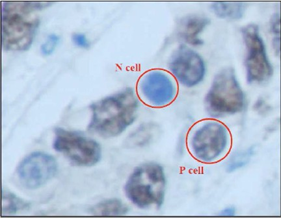

Το πλήθος των θετικών κυττάρων σε αναλογία με το συνολικό πλήθος των κυττάρων της εικόνας (ή αναλογία θετικών κυττάρων προς αρνητικά κύτταρα) είναι μια ιδιαίτερα σημαντική παράμετρος, καθώς καθορίζει την ύπαρξη καρκίνου, το στάδιο της καρκινογένεσης, τον τύπο του καρκίνου κ.ά. και χρησιμοποιείται από το γιατρό τόσο για τη διάγνωση όσο και για το σχεδιασμό κατάλληλης θεραπείας.

Η αξιολόγηση κυτταρολογικών/ιστολογικών εικόνων είναι μια εργασία που απαιτεί κόπο και μπορούν να την αναλάβουν μόνο πολύ καλά εκπαιδευμένοι κυτταρολόγοι/παθολογοανατόμοι. Καθώς η ερμηνεία τους επηρεάζεται από τον υποκειμενικό παράγοντα και είναι αντικείμενο διαγνωστικού λάθους, είναι προφανές ότι υπάρχει τεράστιο ενδιαφέρον για την ανάπτυξη μιας αυτοματοποιημένης διαδικασίας ανάλυσης των εικόνων αυτών. Τα τελευταία χρόνια έχουν παρουσιαστεί διάφορα συστήματα ψηφιακής επεξεργασίας ιστολογικών/κυτταρολογικών εικόνων με σκοπό την ανάλυση και επεξεργασία των εικόνων αυτών και την εξαγωγή πληροφορίας που μπορεί να βοηθήσει τον κυτταρολόγο στη λήψη απόφασης. Τέτοιου είδους συστήματα τα οποία παρέχουν υποστήριξη στη λήψη απόφασης για τη διάγνωση ή την επιλογή σχημάτων παρακολούθησης και θεραπείας, ονομάζονται Συστήματα Υποστήριξης Διάγνωσης (Computer Aided Diagnosis) ή Συστήματα Υποστήριξης Λήψης Κλινικής Απόφασης (Clinical Decision Support Systems).

Στη συνέχεια παρουσιάζεται ένα σύστημα υποστήριξης διάγνωσης, που βασίζεται σε αλγορίθμους ψηφιακής επεξεργασίας εικόνας, για τον αυτόματο εντοπισμό και την κατάλληλη πλαισίωση των καρκινικών κυττάρων στην ιστολογική εικόνα. Σκοπός μας  είναι να βοηθήσουμε το γιατρό ώστε να καταλήξει σε μια πιο γρήγορη, και κυρίως, πιο ακριβή μέτρηση, επισημαίνοντας ακόμα και καρκινικά κύτταρα τα οποία δεν είναι ευδιάκριτα και μπορούν να διαφύγουν από την παρατήρησή του.

### 2.1 Χρωματική ανάλυση και επεξεργασία

Ας φορτώσουμε την κυτταρολογική εικόνα της άσκησης.

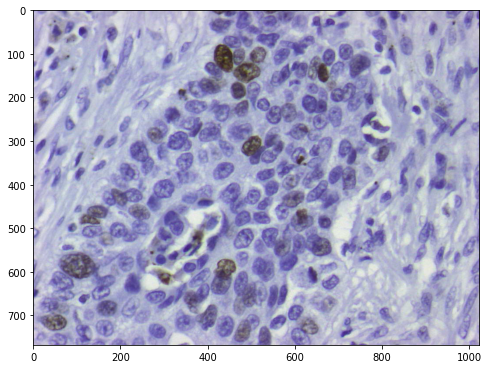

In [ ]:
import skimage.io

img = skimage.io.imread('cytimage.jpg')

plt.figure(figsize=(8, 8))
plt.imshow(img)
plt.show()

Παρατηρώντας την εικόνα αυτή μπορούμε εύκολα να διαπιστώσουμε πως υπάρχουν αρκετά θετικά κύτταρα τα οποία αναγνωρίζονται εύκολα (έντονα καφέ κύτταρα). Ωστόσο, υπάρχουν και πολλά κύτταρα τα οποία δε γίνεται να κατηγοριοποιηθούν με την πρώτη ματιά ως θετικά (κύτταρα με ανοιχτό καφέ χρώμα), και ορίζονται ως ύποπτα κύτταρα. Τα τελευταία πρέπει να μελετηθούν με ιδιαίτερη προσοχή από τον κυτταρολόγο, ούτως ώστε να καταταχθούν σωστά ως καρκινικά ή μη. Επιπλέον, καθώς το πλήθος των κυττάρων στην παραπάνω εικόνα είναι μεγάλο, υπάρχει πάντα η πιθανότητα ορισμένα ύποπτα κύτταρα, τα οποία είναι θετικά, να διαφύγουν από την παρατήρηση του κυτταρολόγου. Είναι αντιληπτό πως τόσο η αξιολόγηση των ύποπτων κυττάρων όσο και η συνολική μέτρηση των θετικών κυττάρων είναι μια ιδιαίτερα χρονοβόρα διαδικασία και απαιτεί πολύ κόπο και μεγάλη εμπειρία.

Αρχικά, η διαθέσιμη πληροφορία που έχουμε είναι η διαφορά στο χρώμα που παρουσιάζουν τα θετικά με τα αρνητικά κύτταρα. Έτσι, ως πρώτο βήμα αναλύουμε την εικόνα σε χρωματικό επίπεδο, ώστε να ελέγξουμε ποιες χρωματικές συνιστώσες προσφέρουν σημαντική πληροφορία.

Κατά τη χρωματική ανάλυση, αρχικώς απεικονίζουμε τις συνιστώσες Red, Green, Blue του χώρου RGB ξεχωριστά, ούτως ώστε να ελέγξουμε σε ποιες από αυτές τα καρκινικά κύτταρα διακρίνονται καλύτερα. Στην πράξη απεικονίζουμε ξεχωριστά τις τρεις grayscale εικόνες R, G και Β οι οποίες συνθέτουν την αρχική εικόνα.

>💡 Παράδειγμα: Προκειμένου να απεικονίσουμε και να μελετήσουμε τη συνιστώσα R μιας εικόνας I, την αποσπάμε από αυτήν ορίζοντας ως εξής: ```I[:,:,0]```



(768, 1024, 3)


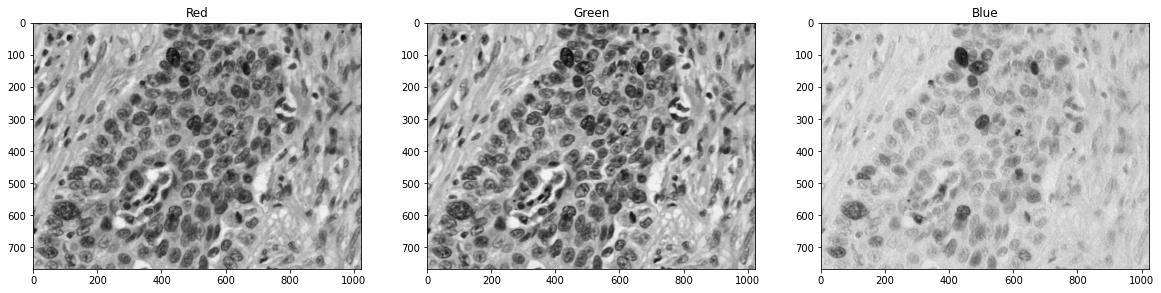

In [ ]:
print(img.shape)

labels = ['Red', 'Green', 'Blue']

plt.figure(figsize=(20,20))

for i in range(3):
  plt.subplot(1,3,i+1)
  plt.title(labels[i])

  plt.imshow(img[:,:,i], cmap='gray')

plt.show()

Μελετώντας τις παραπάνω νέες εικόνες, διαπιστώνουμε πως η συνιστώσα η οποία παρέχει την πιο χρήσιμη πληροφορία για το διαχωρισμό θετικών και αρνητικών κυττάρων είναι η συνιστώσα B του χώρου RGB. Η διαπίστωση αυτή προήλθε αναλύοντας τη φωτεινότητα που παρουσιάζουν τα καρκινικά και τα υγιή κύτταρα στις παραπάνω εικόνες. Κατά την ανάλυση των εικόνων αυτών προέκυψε πως τα καρκινικά κύτταρα παρουσιάζουν αρκετά χαμηλότερη φωτεινότητα σε σχέση με τα υγιή στην εικόνα B. Πρακτικά αυτό σημαίνει πως τα καρκινικά κύτταρα περιέχουν λιγότερο μπλε χρώμα (κάτι το οποίο το γνωρίζαμε εκ των προτέρων). Παρατηρώντας την αρχική εικόνα και την εικόνα Β διαπιστώνουμε πως στην τελευταία διακρίνονται καλύτερα οι περιοχές ενδιαφέροντος. Το γεγονός αυτό μας οδηγεί στην περαιτέρω επεξεργασία της εικόνας Β προκειμένου να οδηγηθούμε σε μια εικόνα στην οποία τα καρκινικά κύτταρα θα απεικονίζονται ευκρινέστερα.

Μια διαδικασία που μπορούμε να εφαρμόσουμε προκειμένου να αυξήσουμε την ευκρίνεια των καρκινικών κυττάρων, είναι η κατάλληλη αύξηση της αντίθεσης της εικόνας B, τέτοια ώστε τα καρκινικά κύτταρα να αναδειχθούν σε σχέση με τα υγιή κύτταρα και τα υπόλοιπα στοιχεία της εικόνας.

Η διαδικασία της προσαρμογής της αντίθεσης περιλαμβάνει δύο ενέργειες.

1.   Την επιλογή των δύο ακραίων τιμών (thresholds). Όλα τα pixels με τιμή κάτω του κατώτατου ορίου θα τεθούν ίσα με το 0, ενώ αντίστοιχα όλα τα pixels με τιμή πάνω του ανωτάτου ορίου θα τεθούν ίσα με το 255.
2.   Τη γραμμική απεικόνιση των υπόλοιπων pixels μεταξύ του 0 και 255.

Ένας απλός τρόπος για να επιτεχυθεί αυτό είναι με τον υπολογισμό:

$$ G(i,j) = (I(i,j) - t_l) \cdot \frac{255}{t_u-t_l} $$

$$ G(i,j) =
	\begin{cases}
		0, &\text{αν } G(i,j) < 0\\
		255, &\text{αν } G(i,j) > 255\\
		\text{σταθ.}, &\text{αλλου}
     \end{cases}
$$

όπου $G(i,j)$ είναι η προκύπτουσα εικόνα, $I(i,j)$ η εικόνα εισόδου, $t_u$ και $t_l$ το ανώτατο και κατώτατο όριο αντίστοιχα.

Στο παρακάτω κομμάτι κώδικα η συνάρτηση της κατωφλίωσης δίνεται έτοιμη. 

Μετά από διάφορες δοκιμές, καταλήξαμε πως τα καρκινικά κύτταρα αναδεικνύονται ικανοποιητικά με την εφαρμογή διαδικασίας προσαρμογής της αντίθεσης της εικόνας Β  στο εύρος φωτεινοτήτων [128, 165].



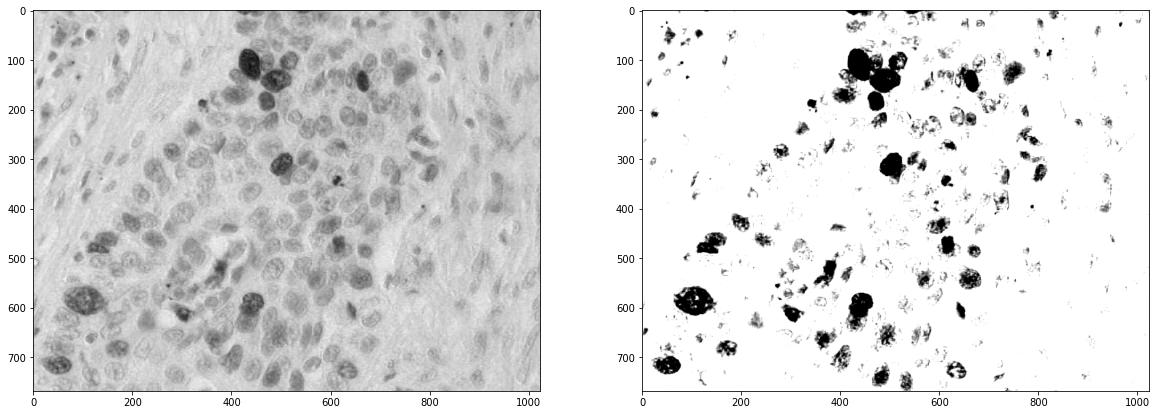

In [ ]:
def imadjust(img, lower, upper):
  out = (img.astype(float) - lower) * (255. / (upper - lower))
  return out.clip(0, 255).round().astype(np.uint8)

blue_ch = img[:,:,2]

plt.figure(figsize=(20,20))

plt.subplot(1,2,1)
plt.imshow(blue_ch, cmap='gray')

blue_ch_adj = imadjust(blue_ch, 128, 165)

plt.subplot(1,2,2)
plt.imshow(blue_ch_adj, cmap='gray')

plt.show()

Η παραπάνω εικόνα, αν και αναδεικνύει τα καρκινικά κύτταρα, δεν είναι άμεσα χρήσιμη στο γιατρό καθώς έχουν χαθεί άλλες χρήσιμες πληροφορίες, όπως τα υγιή κύτταρα ή τα κύτταρα που συνορεύουν ή επικαλύπτονται με τα καρκινικά.

Προκειμένου λοιπόν να δημιουργήσουμε μια εικόνα η οποία θα είναι χρήσιμη για το γιατρό και ταυτόχρονα θα αναδεικνύει τα καρκινικά κύτταρα, μια τεχνική που μπορούμε να εφαρμόσουμε είναι να χρησιμοποιήσουμε την επεξεργασμένη εικόνα blue_ch_adj ως τη συνιστώσα B της έγχρωμης εικόνας RGB (δηλαδή να αντικαταστήσουμε τη Β (ή blue_ch) με τη blue_ch_adj). Για να το κάνουμε αυτό πρέπει να ανακατασκευάσουμε την εικόνα RGB, χρησιμοποιώντας τις εικόνες R, G, και  blue_ch_adj. 

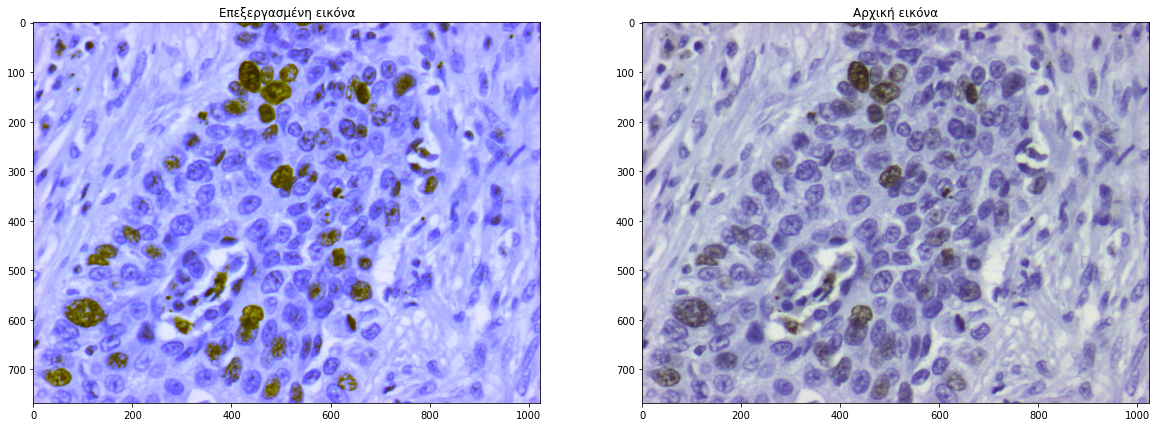

In [ ]:
new_img = np.dstack((img[:,:,0], img[:,:,1], blue_ch_adj))

plt.figure(figsize=(20,20))

plt.subplot(1,2,1)
plt.title("Επεξεργασμένη εικόνα")
plt.imshow(new_img)

plt.subplot(1,2,2)
plt.title("Αρχική εικόνα")
plt.imshow(img)

plt.show()

Συγκρίνοντας το αποτέλεσμα με την αρχική εικόνα, καθίσταται προφανές πως με τη διαδικασία που ακολουθήσαμε καταφέραμε να αυξήσουμε την ευκρίνεια των καρκινικών κυττάρων και επομένως να τα αναδείξουμε.

Με τη διαδικασία αυτή, αν και τα θετικά κύτταρα έχουν αναδειχθεί, το χρωματικό περιεχόμενο της εικόνας έχει μεταβληθεί, γεγονός το οποίο πολλές φορές δεν είναι επιθυμητό από τους γιατρούς. Για το λόγο αυτό εφαρμόζουμε στη συνέχεια ορισμένες πιο σύνθετες τεχνικές προκειμένου να ανιχνεύσουμε και αναδείξουμε τα θετικά κύτταρα, και ταυτόχρονα να παραμείνουν τα χρώματα και η ποιότητα της αρχικής εικόνας αμετάβλητα.

Περαιτέρω μελέτη της εικόνας B ανέδειξε πως σε αυτήν τα θετικά κύτταρα διαφέρουν και ως προς την υφή τους σε σχέση με τα αρνητικά. Αναλύοντας όπως και πριν τις τιμές φωτεινότητας των καρκινικών κυττάρων, διαπιστώνουμε πως εκτός του ότι παρουσιάζουν χαμηλότερη φωτεινότητα σε σχέση με τα υγιή, παρουσιάζουν και μεγαλύτερη ανομοιογένεια στις τιμές φωτεινότητάς τους. Η διαπίστωση αυτή μας οδήγησε στο να εφαρμόσουμε τεχνικές ανάλυσης της υφής στην εικόνα Β.

### 2.2 Ανάλυση υφής

Όπως αναφέρθηκε και στο θεωρητικό μέρος, για την ανάλυση υφής χρησιμοποιούμε την πιο απλή τεχνική, δηλαδή τα στατιστικά στοιχεία υφής.

Κατά την ανάλυση υφής, αρχικά υπολογίζουμε ορισμένα στατιστικά στοιχεία υφής για διάφορες περιοχές ενδιαφέροντος (Region Of Interest – ROI) της εικόνας. Αρχικά λοιπόν πρέπει να αποκόψουμε αρκετές περιοχές ενδιαφέροντος από την εικόνα που μελετούμε (B) προκειμένου να τις αναλύσουμε.

Χρησιμοποιώντας μια διαδραστική απεικόνιση της εικόνας, μπορούμε με τη χρήση του κέρσορα να εντοπίσουμε ακριβώς τον αύξοντα αριθμό των pixels που μας ενδιαφέρουν, ώστε να αποκόψουμε το κατάλληλο ROI της εικόνας.

In [ ]:
import plotly.express as px

px.imshow(blue_ch, color_continuous_scale='gray')

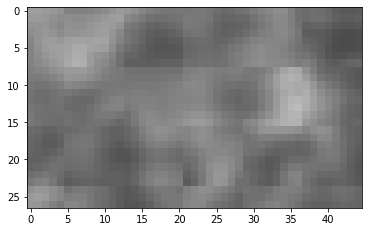

In [ ]:
cropped_img = blue_ch[568:595, 75:120]

plt.imshow(cropped_img, cmap='gray', vmin=0, vmax=255)
plt.show()

Για το ROI που επιλέξαμε, υπολογίζουμε 4 στατιστικά στοιχεία:

1.   Μέση τιμή φωτεινότητας (mean grey level)
2.   Τυπική απόκλιση των επιπέδων φωτεινότητας (standard deviation)
3.   Λοξότητα των επιπέδων φωτεινότητας (skewness)
4.   Κύρτωση των επιπέδων φωτεινότητας (kurtosis)



In [ ]:
from scipy.stats import skew, entropy, kurtosis

avg = np.mean(cropped_img)
std = np.std(cropped_img)
skn = skew(cropped_img, axis=None)
krt = kurtosis(cropped_img, axis=None)

In [ ]:
print('Average gray level: {}\nStandard deviation: {}\nSkewness: {}\nKurtosis: {}'.format(avg, std, skn, krt))

Average gray level: 119.99259259259259
Standard deviation: 20.359544598085353
Skewness: 0.525375880419298
Kurtosis: 0.06853685809741927


### 2.3 Ταξινόμηση περιοχών βάσει της υφής, με χρήση μηχανικής μάθησης

Για τη συγκεκριμένη εφαρμογή αποφασίσαμε να κατασκευάσουμε έναν από τους πιο απλούς ταξινομητές, τον ταξινομητή k κοντινών γειτόνων.
Όπως αναφέρθηκε και στο θεωρητικό μέρος, η πρώτη φάση για την κατασκευή ενός ταξινομητή είναι η συγκέντρωση και ανάλυση γνωστών δεδομένων τα οποία θα χρησιμοποιηθούν για την εκπαίδευσή του. Ο ταξινομητής k κοντινών γειτόνων δεν ακολουθεί κάποιο ειδικό βήμα εκπαίδευσης, αλλά χρησιμοποιεί τα γνωστά δείγματα προκειμένου να συγκρίνει το άγνωστο δείγμα με αυτά και επομένως να το κατατάξει σε κάποια κατηγορία.

Σε αυτή τη φάση της κατασκευής του συστήματος, οι γιατροί μάς τροφοδότησαν με διάφορες κυτταρολογικές εικόνες, στις οποίες φαίνονται ξεκάθαρα θετικά και αρνητικά κύτταρα. Από αυτές τις εικόνες, και υπό την καθοδήγηση των γιατρών, αποκόπηκαν 20 επιβεβαιωμένα καρκινικά κύτταρα, 20 υγιή κύτταρα και 20 περιοχές που αντιστοιχούν στο φόντο της εικόνας (background). Το επόμενο βήμα είναι η εξαγωγή χαρακτηριστικών των γνωστών δειγμάτων προκειμένου να κατασκευαστεί η βάση γνώσης του συστήματος. Όπως είδαμε και προηγουμένως, 4 χαρακτηριστικά υφής εξάγονται από τις υπό διερεύνηση περιοχές.

Συνοψίζοντας, για τη βάση γνώσης του ταξινομητή έχουμε συγκεντρώσει 240 μετρήσεις που προκύπτουν από 4 χαρακτηριστικά υφής για τη συνιστώσα Β, 60 γνωστών δειγμάτων, τα οποία χωρίζονται σε 3 κατηγορίες (θετικά, αρνητικά, φόντο).


Ας φορτώσουμε τις μετρήσεις αυτές.

In [ ]:
import scipy.io

mat = scipy.io.loadmat('groups_train.mat')

Στη συνέχεια, εκπαιδεύουμε τον ταξινομητή με τη χρήση των δεδομένων μας.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(mat["TRAIN_B"], mat["GROUP"].ravel())

KNeighborsClassifier(n_neighbors=3)

Πώς μπορούμε να χρησιμοποιήσουμε τον παραπάνω, εκπαιδευμένο πλέον, ταξινομητή για την ταξινόμηση κάθε περιοχής της εικόνας;

Ένας απλός, αλλά και αργός τρόπος, θα ήταν να ταξινομήσουμε κάθε pixel ξεχωριστά. Δηλαδή, με τη χρήση ενός κυλιόμενου παραθύρου, σε κάθε pixel της εικόνας να υπολογίζουμε τα στατιστικά χαρακτηριστικά μιας μικρής περιοχής (πχ 11x11 pixels), στο κέντρο της οποίας βρίσκεται το pixel υπό διερεύνηση. Όμως με τη χρήση αυτού του τρόπου θα πρέπει να διερευνηθούν 768x1024 =  786432 περιοχές.

Ένας άλλος τρόπος, είναι με χρήση superpixels. Πρόκειται για έναν clustering αλγόριθμο (αλγόριθμος ομαδοποίησης), ο οποίος τμηματοποιεί την εικόνα σε έναν προεπιλεγμένο αριθμό περιοχών. Με αυτόν τον τρόπο, αντί να ελέγξουμε κάθε pixel ξεχωριστά, μπορούμε να ελέγξουμε κάθε superpixel, τα οποία ούτως ή άλλως περιέχουν γειτονικά pixels που εμφανίζουν παρόμοια χαρακτηριστικά. Επιλέγοντας τη δημιουργία 800 superpixels, επιταχύνουμε τον αλγόριθμο εξετάζοντας μόνο 800 περιοχές, αντί για 786432.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



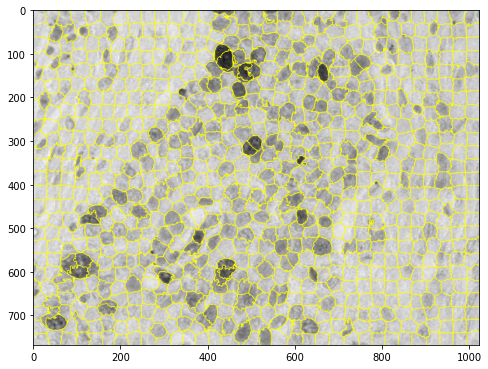

In [ ]:
from skimage.segmentation import slic, mark_boundaries

segm = slic(blue_ch, n_segments=800, compactness=0.2)

plt.figure(figsize=(8,8))
plt.imshow(mark_boundaries(blue_ch, segm))
plt.show()

Έχοντας τμηματοποιήσει την εικόνα, ας ταξινομήσουμε κάθε superpixel ξεχωριστά.

Καθώς δεν εφαρμόζουμε κάποιο γραμμικό φίλτρο (ούτε συνέλιξη ή συσχέτιση), ο αλγόριθμος που θα δώσει την τιμή του κάθε pixel στην εικόνα εξόδου καθορίζεται ανάλογα με το τελικό αποτέλεσμα που επιθυμούμε να δημιουργήσουμε. Στη συγκεκριμένη εφαρμογή μας ενδιαφέρει ο εντοπισμός των περιοχών της εικόνας που αντιστοιχούν σε θετικά κύτταρα. Για το σκοπό αυτό, ορίζουμε τον εξής αλγόριθμο:

* Εάν ένα superpixel ταξινομηθεί στην κατηγορία ‘1’ (θετικά κύτταρα), τότε όλα τα pixels που περιέχονται στο superpixel αυτό, θα λάβουν τιμή 1.
* Αντίστοιχα, εάν ένα superpixel ταξινομηθεί στην κατηγορία ‘2’, τότε όλα τα pixels που περιέχονται στο superpixel αυτό, θα λάβουν τιμή 0.

Με την παραπάνω διαδικασία δημιουργούμε στην πράξη μια δυαδική εικόνα δεικτοδότησης (indexing) στην οποία οι λευκές περιοχές (pixels με τιμή 1) αντιστοιχούν σε περιοχές θετικών κυττάρων.

In [ ]:
from tqdm import tqdm

mask = np.zeros_like(blue_ch)

for i in tqdm(range(np.max(segm))):
  roi = blue_ch[segm==i]

  statistics = [[
    np.mean(roi),
    np.std(roi),
    skew(roi, axis=None),
    kurtosis(roi, axis=None)
  ]]

  pred = neigh.predict(statistics)

  if (pred == 1):
    mask[segm==i] = 1

100%|██████████| 816/816 [00:01<00:00, 461.75it/s]


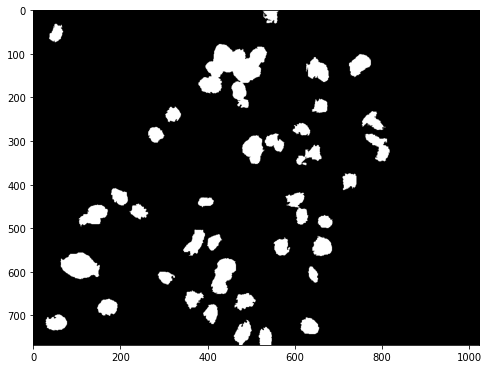

In [ ]:
plt.figure(figsize=(8,8))
plt.imshow(mask, cmap='gray')
plt.show()

### 2.4 Ανίχνευση ακμών ενδιαφέροντος

Η παραπάνω εικόνα είναι μια μάσκα η οποία δείχνει σε ποιες περιοχές της αρχικής εικόνας ανιχνεύθηκαν από τον ταξινομητή θετικά κύτταρα. Σε αυτό το σημείο μπορούμε να εκμεταλλευτούμε την πληροφορία που δίνει η εικόνα αυτή, με τρόπο τέτοιο ώστε να είναι χρήσιμη για το γιατρό. Μια απλή ιδέα είναι να σχεδιάσουμε περιγράμματα στην αρχική εικόνα, γύρω από τις περιοχές που μας δείχνει η μάσκα (λευκές περιοχές).

Για να το πετύχουμε αυτό, το πρώτο βήμα που πρέπει να γίνει είναι να ανιχνεύσουμε  τα περιγράμματα των λευκών περιοχών στη μάσκα. Αυτό μπορούμε να το πετύχουμε με εφαρμογή τεχνικών ανίχνευσης ακμών.

Ας χρησιμοποιήσουμε τον τελεστή Sobel για την ανίχνευση των ακμών:

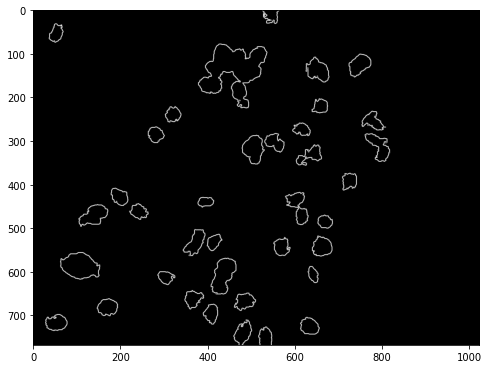

In [ ]:
from skimage import filters

mask2 = filters.sobel(mask)

plt.figure(figsize=(8,8))
plt.imshow(mask2, cmap='gray')
plt.show()

Πλέον, με κατάλληλη επικάλυψη (overlay) της εικόνας πάνω στην αρχική, μπορούμε να εφαρμόσουμε τα περιγράμματα των θετικών κυττάρων.

### 2.5 Τελική επεξεργασία της κυτταρολογικής εικόνας και συμπεράσματα

Προκειμένου να επισημάνουμε στον κυτταρολόγο τις περιοχές όπου ανιχνεύθηκαν θετικά κύτταρα, σχεδιάζουμε τα περιγράμματα της τελευταίας εικόνας με κόκκινο χρώμα πάνω στην αρχική εικόνα. 

Για να το πετύχουμε αυτό αρκεί απλώς να επεξεργαστούμε την αρχική εικόνα, ώστε τα pixels τα οποία συμπίπτουν με τα pixels του περιγράμματος να πάρουν την τιμή [255, 0, 0], δηλαδή καθαρό κόκκινο χρώμα.

(768, 1024, 3)
(768, 1024)


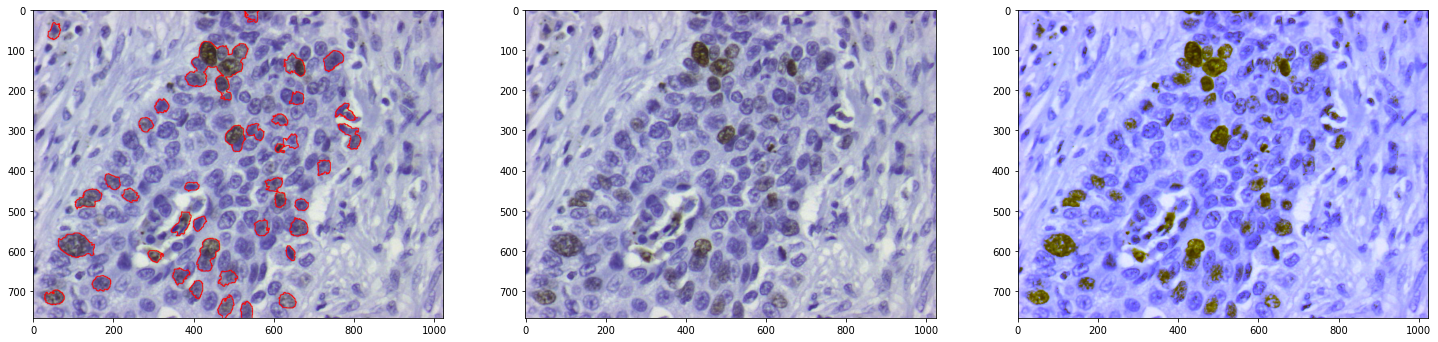

In [ ]:
final_img = np.copy(img)
final_img[mask2>0] = [255, 0, 0]
print(final_img.shape)
print(mask2.shape)

plt.figure(figsize=(25,25))
plt.subplot(1,3,1)
plt.imshow(final_img)

plt.subplot(1,3,2)
plt.imshow(img)

plt.subplot(1,3,3)
plt.imshow(new_img)

plt.show()

Πλαισιώνοντας κατάλληλα τα κύτταρα που ανιχνεύθηκαν ως θετικά από τον ταξινομητή, βοηθούμε το γιατρό σε μεγάλο βαθμό να κάνει τη μέτρηση αρκετά πιο γρήγορα. Με την παραπάνω επεξεργασία, τον βοηθούμε επίσης να κάνει λιγότερα λάθη, επισημαίνοντάς του και κύτταρα τα οποία μπορεί να διαφύγουν από την παρατήρησή του. Παρατηρώντας την αρχική εικόνα και την τελική επεξεργασμένη εικόνα είναι εύκολο να διαπιστώσει κανείς πως το σύστημα ανίχνευσε ως θετικά καρκινικά κύτταρα τα οποία δεν φαίνονται ξεκάθαρα στην αρχική εικόνα.

Χρησιμοποιώντας εξελιγμένες τεχνικές επεξεργασίας εικόνας, όπως ειδικές τεχνικές ανάλυσης υφής, και εξελιγμένες τεχνικές ταξινόμησης, όπως τεχνητά νευρωνικά δίκτυα, μπορούμε να βελτιώσουμε το σύστημα αυτό και να καταλήξουμε σε ακόμα καλύτερα αποτελέσματα. Για παράδειγμα, εφαρμόζοντας εξελιγμένες τεχνικές επεξεργασίας εικόνας μπορούμε να διαχωρίσουμε τα κύτταρα που είναι ενωμένα μεταξύ τους και τελικώς να υπολογίσουμε αυτόματα το πλήθος των θετικών κύτταρων. Αλλάζοντας τον αλγόριθμο ταξινόμησης ώστε να ανιχνεύονται τα αρνητικά κύτταρα, μπορούμε τελικά να υπολογίσουμε και το πλήθος των αρνητικών κυττάρων της εικόνας. Έτσι, μια ολοκληρωμένη εφαρμογή υποστήριξης διάγνωσης θα περιλαμβάνει τον αυτόματο υπολογισμό του πλήθους των θετικών και των αρνητικών κυττάρων της εικόνας και θα επιστρέφει την αναλογία αυτών, παράμετρος που όπως αναφέρθηκε αποτελεί πολύ σημαντικό στοιχείο για τη διάγνωση.

Συνοψίζοντας, στη συγκεκριμένη εφαρμογή παρουσιάσαμε ένα σύστημα υποστήριξης διάγνωσης για την ανίχνευση καρκινικών κυττάρων σε κυτταρολογικές/ιστολογικές  εικόνες, χρησιμοποιώντας ορισμένες βασικές τεχνικές επεξεργασίας εικόνας και αναγνώρισης προτύπων. Σύμφωνα και με τη γνώμη των γιατρών, το σύστημα αυτό  αποδίδει αρκετά ικανοποιητικά, αποτελώντας ένα χρήσιμο εργαλείο για την κυτταρολογία. Αξίζει να σημειωθεί ότι από τη στιγμή που έχουμε υλοποιήσει την παραπάνω εφαρμογή, μπορούμε ανά πάσα στιγμή να αναλύσουμε νέες κυτταρολογικές εικόνες.


*Θερμές ευχαριστίες στον Αναπληρωτή Καθηγητή κ. Πέτρο Καρακίτσο, Εργαστήριο Διαγνωστικής Κυτταρολογίας της Ιατρικής Σχολής του Εθνικού και Καποδιστριακού Πανεπιστημίου Αθηνών, για την παραχώρηση των εικόνων και τη βοήθειά του στα πλαίσια της παρούσας άσκησης.*